In [16]:
import os
import pandas as pd
import tensorflow
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed


from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json

                                                                    #Data Preprocessing  
data_dir = 'D:\\bearing_fault_data\\normal'
merged_data = pd.DataFrame()
counter = 1
for filename in os.listdir(data_dir):#each for loop reads millions of data points from each fault catagory
    #print(filename)
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep=',')
    #print(dataset)

    # tmp_dataset_squared = np.square(dataset)
    # tmp_dataset_mean = np.array(tmp_dataset_squared.mean())
    # dataset_mean_abs = np.sqrt(tmp_dataset_mean)

    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,8))
    #dataset_mean_abs.index = [filename]
    filename = filename[:-4]
    dataset_mean_abs['FaultType'] = 0                        #Add manual Label based on data folder
    counter = counter+1
    
    merged_data = merged_data.append(dataset_mean_abs)

data_dir = 'D:\\bearing_fault_data\\imbalance\\6g'
#merged_data = pd.DataFrame()
print(counter)
for filename in os.listdir(data_dir):
    #print(filename)
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep=',')
    #print(dataset)

    # tmp_dataset_squared = np.square(dataset)
    # tmp_dataset_mean = np.array(tmp_dataset_squared.mean())
    # dataset_mean_abs = np.sqrt(tmp_dataset_mean)

    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,8))
    #dataset_mean_abs.index = [filename]
    filename = filename[:-4]
    dataset_mean_abs['FaultType'] = 1
    counter = counter+1
    merged_data = merged_data.append(dataset_mean_abs)

data_dir = 'D:\\bearing_fault_data\\overhang\\ball_fault\\0g'
#merged_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    #print(filename)
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep=',')
    #print(dataset)

    # tmp_dataset_squared = np.square(dataset)
    # tmp_dataset_mean = np.array(tmp_dataset_squared.mean())
    # dataset_mean_abs = np.sqrt(tmp_dataset_mean)

    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,8))
    #dataset_mean_abs.index = [filename]
    filename = filename[:-4]
    dataset_mean_abs['FaultType'] = 2
    counter = counter+1
    merged_data = merged_data.append(dataset_mean_abs)

print(counter)


50
148


In [17]:
print(merged_data)

           0         1         2         3         4         5         6  \
0   0.980382  0.851480  0.264751  0.036690  0.544825  0.025468  0.159750   
0   0.991549  1.076952  0.266087  0.037932  0.741583  0.025314  0.235244   
0   1.002206  1.150378  0.263226  0.040066  0.654136  0.026291  0.158235   
0   1.014647  1.118109  0.265598  0.041363  0.688802  0.025762  0.165564   
0   1.028982  0.983267  0.279629  0.044323  0.635340  0.024847  0.213260   
..       ...       ...       ...       ...       ...       ...       ...   
0   1.288894  4.964272  3.781070  7.957199  0.855259  0.873318  0.903183   
0   1.289915  5.188806  3.779417  8.058788  0.857031  0.967978  0.933877   
0   1.326126  5.373538  3.562423  8.132476  0.834156  1.088928  0.984584   
0   1.329111  5.458745  3.518684  8.235668  0.875341  1.160620  1.009612   
0   1.418884  5.556572  3.655359  8.377900  0.816050  1.144756  1.006218   

           7  FaultType  
0   0.092024          0  
0   0.094424          0  
0   0.107

(array([-0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,
         2.  ,  2.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

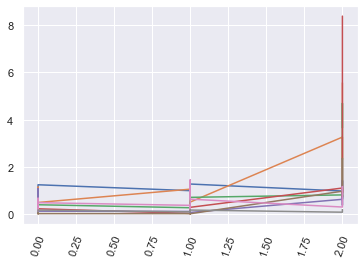

In [18]:



num_cols = ['Bearing 1']
merged_data.columns = ['Bearing 1-1','Bearing 1-2','Bearing 2-1','Bearing 2-2', 'Bearing 3-1','Bearing 3-2','Bearing 4-1','Bearing 4-2', 'FaultType']
merged_data.reset_index(drop=True, inplace=True)
#merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
#merged_data.index = pd.to_datetime(merged_data.index, format='UTC')
#merged_data = merged_data.sort_index()
merged_data.to_csv('Imb1.csv')
#merged_data.index.names = ['index']
#merged_data.head()
num_cols = ['Bearing 1-1','Bearing 1-2','Bearing 2-1','Bearing 2-2', 'Bearing 3-1','Bearing 3-2','Bearing 4-1','Bearing 4-2']

dataset_train = merged_data #['2004-02-12 11:02:39':'2004-02-13 23:52:39']
#dataset_test = merged_data['2004-02-13 23:52:39':]
#dataset_train.plot(merged_data.loc[:,"date"], merged_data.loc[:,"Bearing 1"], figsize = (12,6))
plt.plot(merged_data["FaultType"], merged_data[num_cols])
plt.xticks(rotation=70)


In [19]:
merged_data.tail(n=25)

,Bearing 1-1,Bearing 1-2,Bearing 2-1,Bearing 2-2,Bearing 3-1,Bearing 3-2,Bearing 4-1,Bearing 4-2,FaultType
122,1.162478,3.165791,1.727428,3.914067,1.150920,1.295417,0.785900,0.157889,2
123,1.190943,3.112116,1.649955,4.264683,1.031796,1.238063,0.794550,0.160848,2
124,1.180551,3.328537,1.814841,4.116012,0.989915,1.065526,0.692487,0.162533,2
125,1.197117,3.320112,1.844460,4.250752,0.966359,0.910042,0.687956,0.164558,2
126,1.192999,3.461882,2.048280,4.405922,0.682128,0.926270,0.698222,0.168105,2
127,1.190278,4.302618,1.904335,4.140043,0.764292,1.443722,0.853891,0.168546,2
128,1.196117,4.720262,1.994325,4.553573,0.951119,1.509685,0.879557,0.169562,2
129,1.221305,5.051484,2.250447,5.097200,1.085151,1.525179,0.917522,0.171272,2
130,1.308914,3.552063,2.258620,5.641214,1.100052,1.038943,0.805657,0.175353,2
131,1.226224,3.291895,2.159995,6.147942,0.901672,1.035799,0.908198,0.179144,2


In [20]:
#Importing the necessary packages and libaries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np

dataset = merged_data.values
scaler = StandardScaler()
X = dataset[:,0:8].astype(float)
X = scaler.fit_transform(X)
Y = dataset[:,8].astype(int)
# print(type(Y[0]))

# X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8)

linear = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

linear_pred = linear.predict(X_test)

accuracy_lin = linear.score(X_test, y_test)
print(accuracy_lin)

cm_lin = confusion_matrix(y_test, linear_pred)

print(cm_lin)













0.9
[[12  3  0]
 [ 0  7  0]
 [ 0  0  8]]
